In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
#from __future__ import print_function

In [3]:
import pymc

In [5]:
n = 5*np.ones(4, dtype=int)
x = np.array([-.86,-.3,-.05,.73])

In [6]:
n

array([5, 5, 5, 5])

In [7]:
x

array([-0.86, -0.3 , -0.05,  0.73])

In [8]:
alpha = pymc.Normal('alpha', mu=0, tau=.01)
beta = pymc.Normal('beta', mu=0, tau=.01)

In [9]:
alpha

<pymc.distributions.Normal 'alpha' at 0x000000000C91B630>

In [10]:
help(alpha)

Help on Normal in module pymc.distributions object:

alpha = class Normal(pymc.PyMCObjects.Stochastic)
 |  N = Normal(name, mu, tau, value=None, observed=False, size=1, trace=True, rseed=True, doc=None, verbose=-1, debug=False)
 |  
 |  Stochastic variable with Normal distribution.
 |  Parents are: mu, tau.
 |  
 |  Docstring of log-probability function:
 |  
 |      Normal log-likelihood.
 |  
 |      .. math::
 |          f(x \mid \mu, \tau) = \sqrt{\frac{\tau}{2\pi}} \exp\left\{ -\frac{\tau}{2} (x-\mu)^2 \right\}
 |  
 |      :Parameters:
 |        - `x` : Input data.
 |        - `mu` : Mean of the distribution.
 |        - `tau` : Precision of the distribution, which corresponds to
 |          :math:`1/\sigma^2` (tau > 0).
 |  
 |      .. note::
 |         - :math:`E(X) = \mu`
 |         - :math:`Var(X) = 1/\tau`
 |  
 |  Method resolution order:
 |      Normal
 |      pymc.PyMCObjects.Stochastic
 |      pymc.Node.StochasticBase
 |      pymc.six.NewBase
 |      pymc.Node.Variable
 

In [12]:
alpha.plot

In [13]:
# Import relevant modules
import pymc
import numpy as np

# Some data
n = 5*np.ones(4,dtype=int)
x = np.array([-.86,-.3,-.05,.73])

# Priors on unknown parameters
alpha = pymc.Normal('alpha',mu=0,tau=.01)
beta = pymc.Normal('beta',mu=0,tau=.01)

# Arbitrary deterministic function of parameters
@pymc.deterministic
def theta(a=alpha, b=beta):
    """theta = logit^{-1}(a+b)"""
    return pymc.invlogit(a+b*x)

# Binomial likelihood for data
d = pymc.Binomial('d', n=n, p=theta, value=np.array([0.,1.,3.,5.]),\
                  observed=True)

In [15]:
import pymc
import mymodel

 [-----------------100%-----------------] 10000 of 10000 complete in 0.5 secPlotting beta
Plotting theta_0
Plotting theta_1
Plotting theta_2
Plotting theta_3
Plotting alpha


C:\Users\ddooling\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


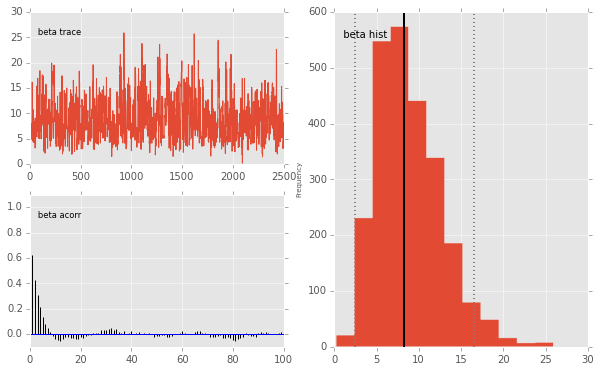

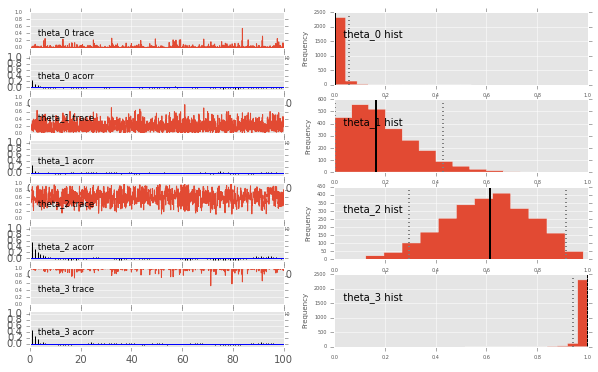

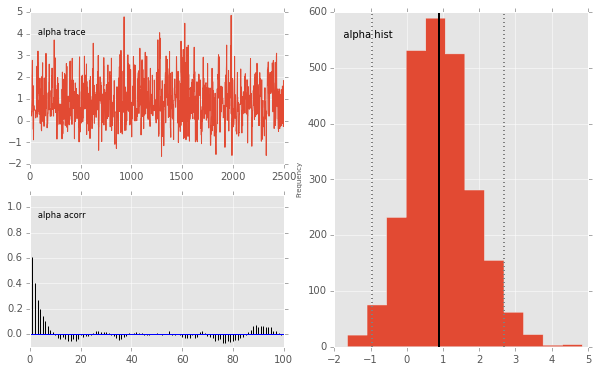

In [16]:

S = pymc.MCMC(mymodel, db='pickle')
S.sample(iter=10000, burn=5000, thin=2)
pymc.Matplot.plot(S)

In [17]:
from pymc import DiscreteUniform, Exponential, deterministic, Poisson, Uniform
import numpy as np

In [19]:
disasters_array =   \
     np.array([ 4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                   3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                   2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                   1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                   0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                   3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                   0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])
    
    
switchpoint = DiscreteUniform('switchpoint', lower=0, upper=110, doc='Switchpoint[year]')

early_mean = Exponential('early_mean', beta=1.)
late_mean = Exponential('late_mean', beta=1.)

@deterministic(plot=False)
def rate(s=switchpoint, e=early_mean, l=late_mean):
    ''' Concatenate Poisson means '''
    out = np.empty(len(disasters_array))
    out[:s] = e
    out[s:] = l
    return out

disasters = Poisson('disasters', mu=rate, value=disasters_array, observed=True)